## Гребневая (Ridge) регрессия (линейная с L2 регуляризацией)

In [1]:
import numpy as np

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin

class MyRidgeRegression(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=100, lr=0.1, k=0.5):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
        self.k = k
        
    def fit(self, X, y):
        
        w = np.random.randn(X.shape[1])
        n_objects = len(X)
        
        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=self.batch_size)
            alpha = self.k * np.eye(w.shape[0])
            grad = 2 * (X[sample_indices].T @ X[sample_indices] / self.batch_size + alpha) @ w
            grad -= 2 * X[sample_indices].T @ y[sample_indices].reshape(-1) / self.batch_size
            w -= grad * self.lr
        
        self.w = w
        return self
        
    def predict(self, X):
        return X @ self.w

Долго думал, оставлять или нет, но сверху косячная регрессия, выдает бешенный лосс.... Я чет так и не нашел ошибку, написал аналитическое решение...

In [3]:
from sklearn.base import BaseEstimator, RegressorMixin

class MyRidgeRegression(BaseEstimator, RegressorMixin):
    
    def __init__(self, k=0.5):
        self.k = k
        
    def fit(self, X, y):
        
        alpha = self.k * np.eye(X.shape[1])
        self.w = np.linalg.inv(X.T @ X + alpha) @ X.T @ y
        return self
        
    def predict(self, X):
        return X @ self.w

In [4]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
own_model = MyRidgeRegression().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = Ridge().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)
sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.9999958305832507
R^2 in sklearn loss: 0.9999999996088385


## Логистическая регрессия

In [8]:
class MyLogisticRegression(BaseEstimator, RegressorMixin):
    
    def __init__(self, num_steps=100, lr=0.1):
        self.num_steps = num_steps
        self.lr = lr
        
    def sigmoid(self, h):
        return 1. / (1 + np.exp(-h))
        
    def fit(self, X, y):
        
        w = np.random.randn(X.shape[1])
        n_objects = len(X)

        for i in range(self.num_steps):
            grad = np.dot(X.T, (self.sigmoid(X @ w) - y)) / len(y)
            w -= grad * self.lr        
        
        self.w = w
        return self

    def predict_proba(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

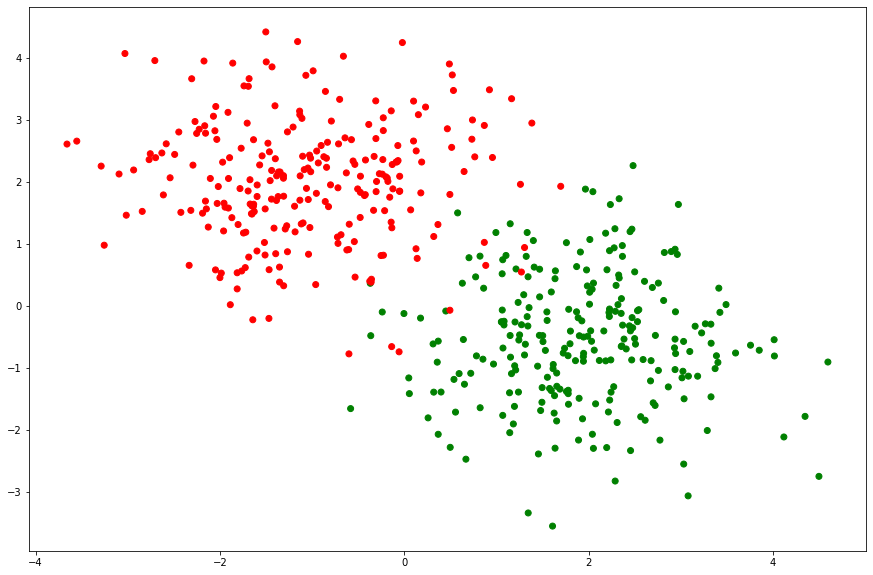

In [12]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X, y = make_blobs(n_samples=500, centers=[[-1,2],[2,-0.5]], cluster_std=1, random_state=0)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [13]:
own_model = MyLogisticRegression()
own_model.fit(X, y)

MyLogisticRegression()

<ipython-input-14-94559167e091>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


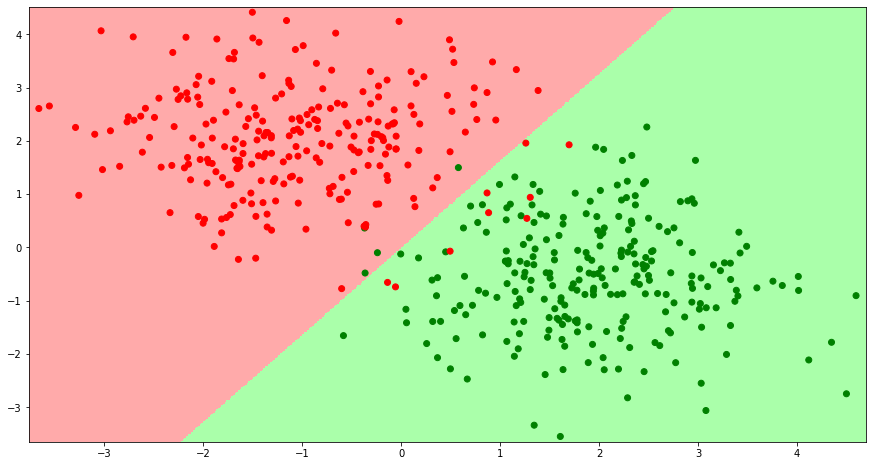

In [14]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = own_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)